In [ ]:
# Plot data from the VIEWS surrogate (interpretation models) 

This notebooks loads data from the internal VIEWS database; se

In [1]:
#To plot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.animation import PillowWriter
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap
from scipy import interpolate
from matplotlib import gridspec
from matplotlib import cm
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors

import seaborn as sns

#To fetch url 
import requests
import json

# sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Views 3
from viewser.operations import fetch
from viewser import Queryset, Column
import views_runs
from views_partitioning import data_partitioner, legacy
from stepshift import views
from views_runs import storage, ModelMetadata
from views_runs.storage import store, retrieve, fetch_metadata
from views_forecasts.extensions import *

# For mapping 
import os
from views_mapper2.mapper2 import *
from views_mapper2.BBoxWriter import *
from views_mapper2.dictionary_writer import *
from views_mapper2.label_writer import *
from ingester3.extensions import *

In [2]:
import geopandas as gpd
import sqlalchemy as sa
from ingester3.config import source_db_path

#Fetching geometry and matching to VIEWS country id's

engine = sa.create_engine(source_db_path)
gdf_ci_master = gpd.GeoDataFrame.from_postgis(
    "SELECT id as country_id, name, in_africa, in_me, geom FROM prod.country",
    engine,
    geom_col='geom'
)
gdf_ci_master = gdf_ci_master.to_crs(4326)

In [3]:
import os
home = os.path.expanduser("~")
desktop = home+'/Desktop/maps' # (Toggle on to save to desktop) Change to your directory

In [4]:
calib_run_id = 46

surrogate_CH = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_surrogate_CH_f526')
surrogate_DEM = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_surrogate_Dem_f526')
surrogate_RULE = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_surrogate_Rule_f526')
surrogate_POP = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_surrogate_Pop_f526')
surrogate_IMR = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_surrogate_IMR_f526')
surrogate_NCH = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_surrogate_NCH_f526')
surrogate_WATER = pd.DataFrame.forecasts.read_store(run=calib_run_id, name='cm_surrogate_Water_f526')

pr_46_cm_surrogate_CH_f526.parquet
pr_46_cm_surrogate_Dem_f526.parquet
pr_46_cm_surrogate_Rule_f526.parquet
pr_46_cm_surrogate_Pop_f526.parquet
pr_46_cm_surrogate_IMR_f526.parquet
pr_46_cm_surrogate_NCH_f526.parquet
pr_46_cm_surrogate_Water_f526.parquet


FileNotFoundError: [Errno 2] No such file or directory: '/Users/angli742/Desktop/maps/conflicthistory_map.png'

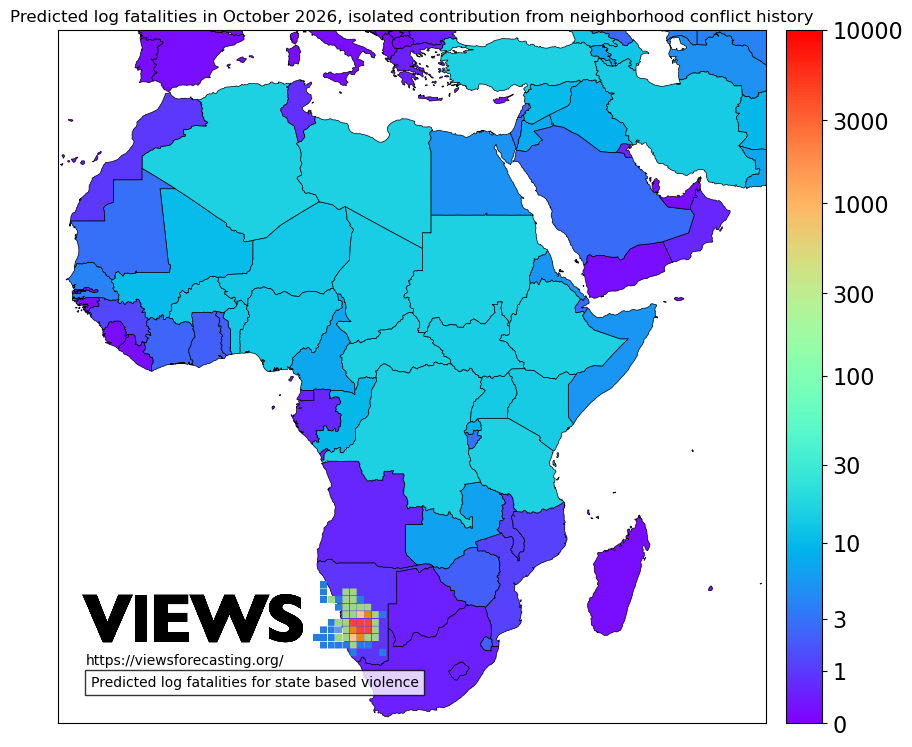

In [ ]:
#Regional maps of surrogate models 
#Adjust region, textbox, title, column= and filename.

data= surrogate_NCH.copy() # replace with one of the dataframes defined above: e.g., surrogate_CH, surrogate_POP etc.
gdf = gdf_ci_master.copy()

data = data.join(gdf.set_index("country_id"))
gdf = gpd.GeoDataFrame(data, geometry="geom")

region = 'ame' #options are 'ame', 'me' or 'globe'

textbox = 'Predicted log fatalities for state based violence' #Change the text in the textbox below the logo


test_map=Mapper2(
    width=10,   #dimension width
    height=10,  #dimension height
    frame_on=True,
    title="Predicted log fatalities in October 2026, isolated contribution from neighborhood conflict history", #title ex: Predicted log fatalities, isolated contribution from infant mortality rate
    bbox=bbox_from_cid(f'{region}'), 
).add_layer(
    gdf=gdf.loc[562],  #what do you want to map, month_id 527 in this case
    map_dictionary = dictionary_stand_1p_10k,
    cmap = 'rainbow',
    transparency = 1,
    background = None, 
    edgecolor="black",   #border color choice
    linewidth=0.5,    #line size choice
    column="Neighborhood conflict"   #which column do you want to graph
).add_views_textbox(
    text=textbox)



test_map.save(desktop+'/conflicthistory_map') #change the filename 